# Adding Sector Merging

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('sp500_historical_data.csv')
df2 = pd.read_csv('constituents.csv')
df2=df2.rename(columns = {"Symbol" : "Ticker"})
df2=df2.drop(columns=["Security", "GICS Sub-Industry","Date added","CIK","Founded","Headquarters Location"])
df2.head()

,Ticker,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [45]:
df.info

<bound method DataFrame.info of               Date        Open        High         Low       Close  \
0       2020-01-02  148.561874  150.510040  148.110367  150.501678   
1       2020-01-03  148.010040  149.381271  146.847824  149.205688   
2       2020-01-06  148.118729  149.423080  147.449829  149.347824   
3       2020-01-07  149.063538  149.255859  147.842804  148.745819   
4       2020-01-08  148.829437  151.755859  148.536789  151.028427   
...            ...         ...         ...         ...         ...   
498599  2023-12-22  195.320007  195.910004  192.740005  194.979996   
498600  2023-12-26  194.880005  196.339996  194.089996  195.500000   
498601  2023-12-27  195.410004  197.009995  194.740005  196.899994   
498602  2023-12-28  197.619995  198.600006  196.529999  197.160004   
498603  2023-12-29  196.679993  198.009995  196.250000  197.369995   

         Adj Close   Volume Ticker  
0       120.669174  4307633    MMM  
1       119.630074  2950412    MMM  
2       119.7440

In [46]:
df3 = pd.merge(df, df2, on="Ticker", how="left")

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498604 entries, 0 to 498603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         498604 non-null  object 
 1   Open         498604 non-null  float64
 2   High         498604 non-null  float64
 3   Low          498604 non-null  float64
 4   Close        498604 non-null  float64
 5   Adj Close    498604 non-null  float64
 6   Volume       498604 non-null  int64  
 7   Ticker       498604 non-null  object 
 8   GICS Sector  483514 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 34.2+ MB


In [49]:
df3[['GICS Sector']].isnull().sum()

GICS Sector    15090
dtype: int64

In [50]:
null_values = df3.isnull()
print(null_values)

         Date   Open   High    Low  Close  Adj Close  Volume  Ticker  \
0       False  False  False  False  False      False   False   False   
1       False  False  False  False  False      False   False   False   
2       False  False  False  False  False      False   False   False   
3       False  False  False  False  False      False   False   False   
4       False  False  False  False  False      False   False   False   
...       ...    ...    ...    ...    ...        ...     ...     ...   
498599  False  False  False  False  False      False   False   False   
498600  False  False  False  False  False      False   False   False   
498601  False  False  False  False  False      False   False   False   
498602  False  False  False  False  False      False   False   False   
498603  False  False  False  False  False      False   False   False   

        GICS Sector  
0             False  
1             False  
2             False  
3             False  
4             False  
...

In [51]:
df3.to_csv('sp500_historical_data_sector_merged.csv')

# Preliminary Visuals

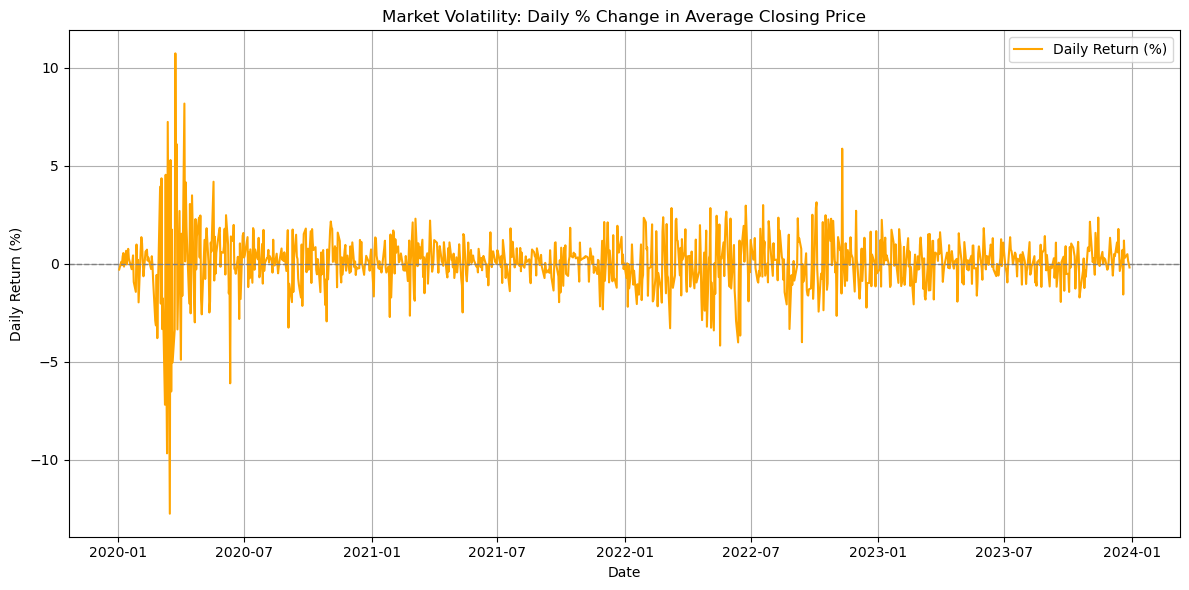

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

market_trend = df.groupby('Date')['Close'].mean().reset_index()
market_trend.rename(columns={'Close': 'Avg_Close'}, inplace=True)

market_trend['Daily_Return'] = market_trend['Avg_Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(market_trend['Date'], market_trend['Daily_Return'], color='orange', label='Daily Return (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Market Volatility: Daily % Change in Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


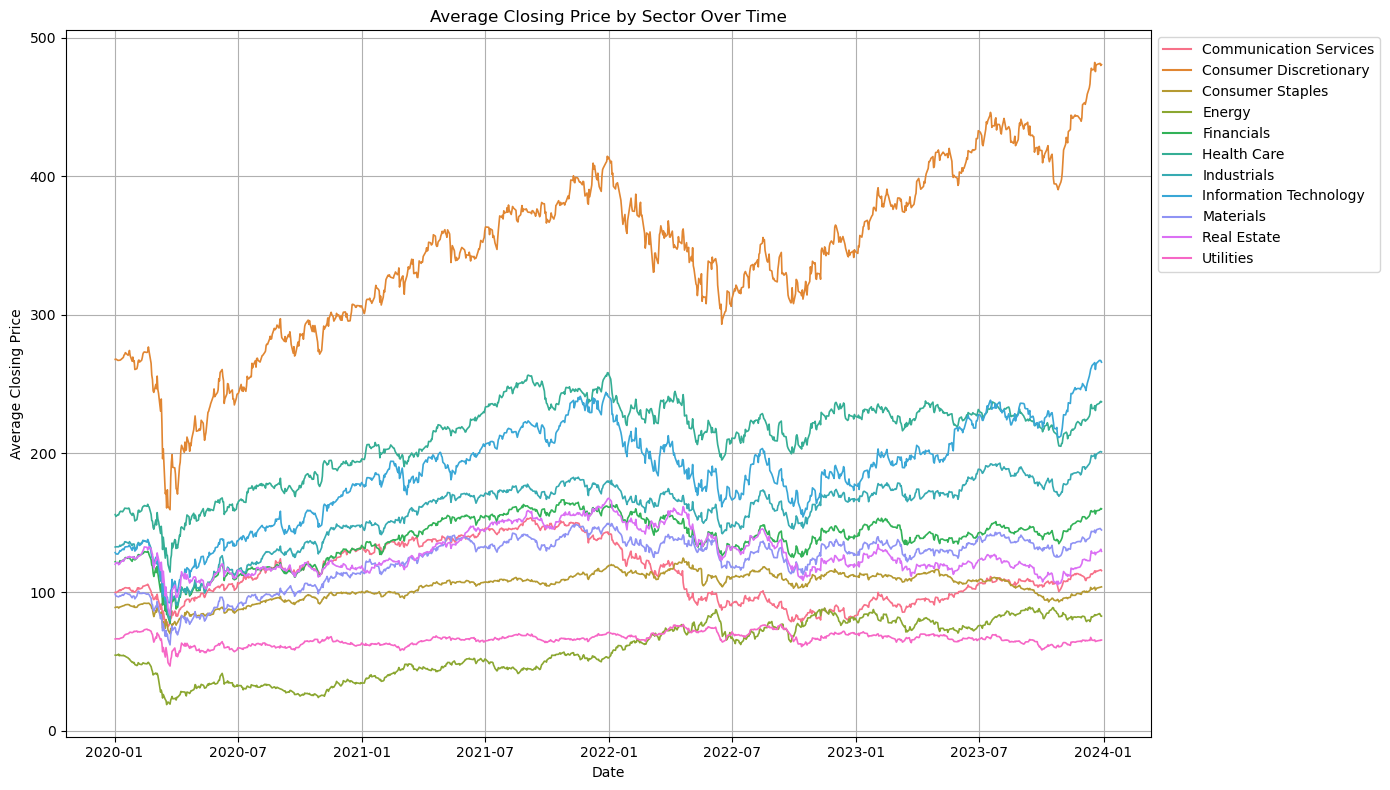

In [56]:
import seaborn as sns

sector_trend = df.groupby(['Date', 'GICS Sector'])['Close'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_trend, x='Date', y='Close', hue='GICS Sector', linewidth=1.2)
plt.title('Average Closing Price by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


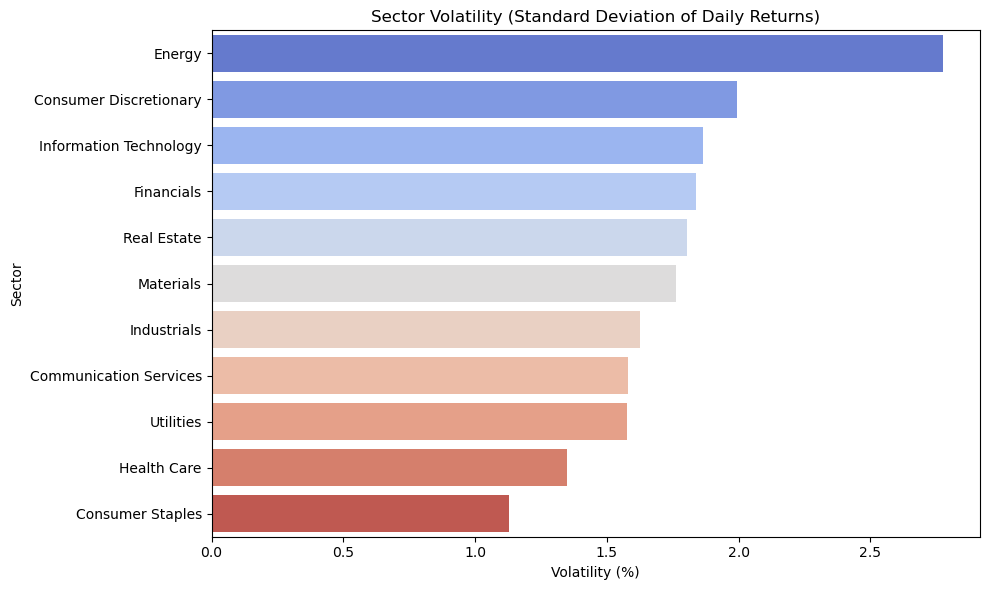

In [59]:
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change() * 100

sector_daily_return = df.groupby(['Date', 'GICS Sector'])['Daily_Return'].mean().reset_index()

sector_volatility = sector_daily_return.groupby('GICS Sector')['Daily_Return'].std().reset_index()
sector_volatility.rename(columns={'Daily_Return': 'Volatility'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=sector_volatility.sort_values('Volatility', ascending=False), x='Volatility', y='GICS Sector', palette='coolwarm')
plt.title('Sector Volatility (Standard Deviation of Daily Returns)')
plt.xlabel('Volatility (%)')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()


In [94]:
market_trend.info

<bound method DataFrame.info of            Date   Avg_Close  Daily_Return
0    2020-01-02  131.526951           NaN
1    2020-01-03  131.133831     -0.298890
2    2020-01-06  131.257991      0.094682
3    2020-01-07  131.153968     -0.079251
4    2020-01-08  131.625883      0.359817
...         ...         ...           ...
1001 2023-12-22  199.806183      0.287658
1002 2023-12-26  200.779307      0.487034
1003 2023-12-27  201.068799      0.144184
1004 2023-12-28  201.047440     -0.010623
1005 2023-12-29  200.660459     -0.192482

[1006 rows x 3 columns]>

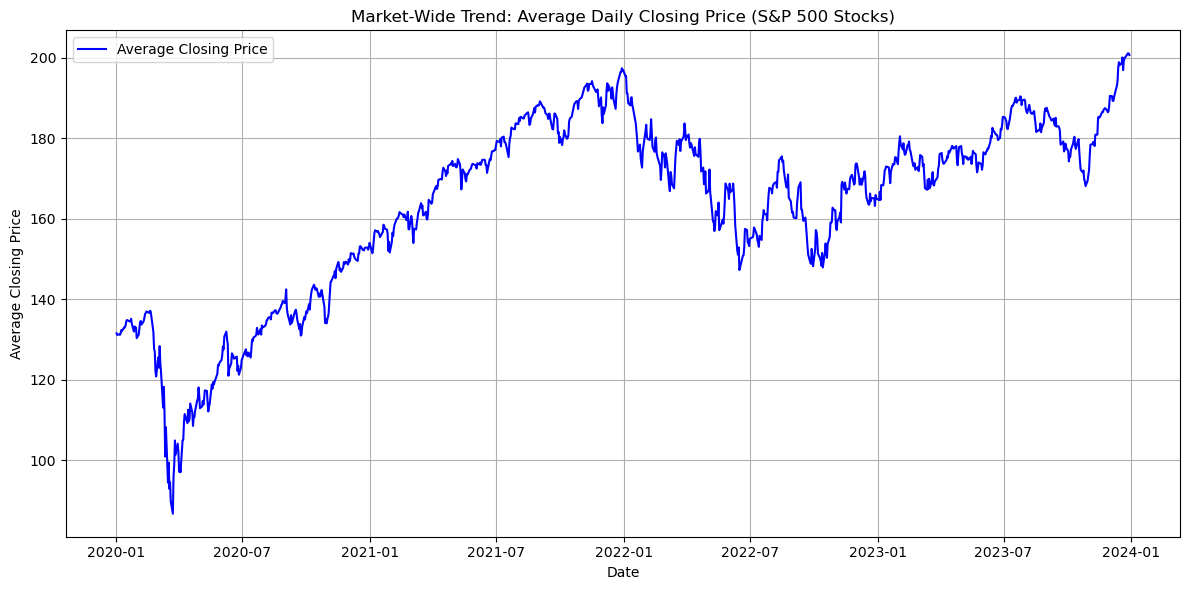

In [60]:
market_trend = df.groupby('Date')['Close'].mean().reset_index()
market_trend.rename(columns={'Close': 'Avg_Close'}, inplace=True)

# Plot: Market-Wide Trend
plt.figure(figsize=(12, 6))
plt.plot(market_trend['Date'], market_trend['Avg_Close'], color='blue', label='Average Closing Price')
plt.title('Market-Wide Trend: Average Daily Closing Price (S&P 500 Stocks)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


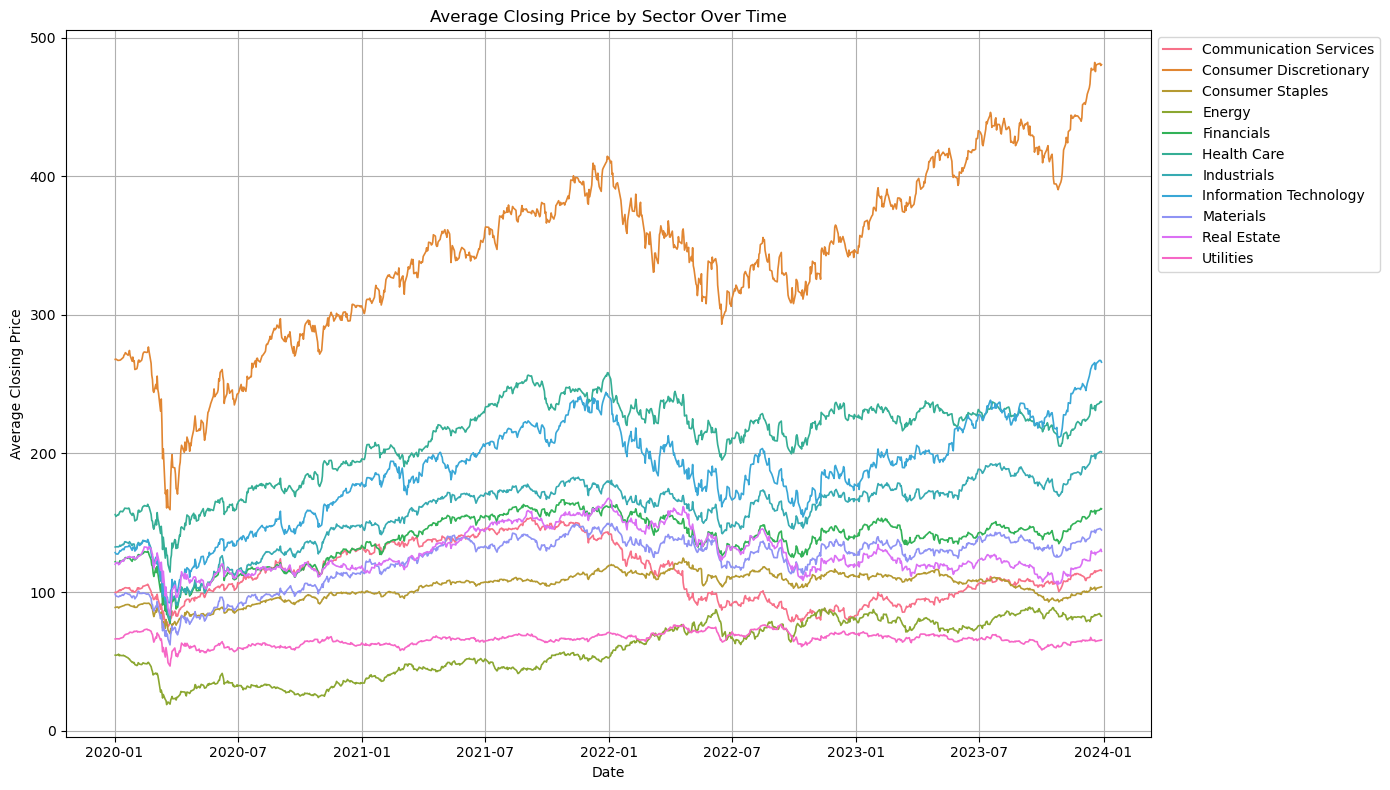

In [63]:
sector_trend = df.groupby(['Date', 'GICS Sector'])['Close'].mean().reset_index()

# Plot: Sector Trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_trend, x='Date', y='Close', hue='GICS Sector', linewidth=1.2)
plt.title('Average Closing Price by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
